
# Project: Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
#### table columns

- id
- imdb_id 
- popularity
- budget 
- revenue
- original_title
- cast
- homepage 
- director
- tagline
- keywords
- overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj -> show the budget of the associated movie in terms of 2010 dollars
- revenue_adj -> show the revenue of the associated movie in terms of 2010 dollars


### Question(s) for Analysis

- <a href="#Q1">Q1: is there a relation between budget and revenue?</a>
- <a href="#Q2">Q2: is there a relation between average vote and revenue?</a>
- <a href="#Q3">Q3: is there a relation between budget and average vote?</a>
- <a href="#Q14">Q4: is there a relation between net profit and average vote?</a>
- <a href="#Q4">Q5: what is the best genres of films according to average vote?</a>
- <a href="#Q5">Q6: What is the best genres of films according to revenue?</a>
- <a href="#Q6">Q7: What is the best genres of films according to popularity?</a>
- <a href="#Q7">Q8: What is the best director of films according to average vote?</a>
- <a href="#Q8">Q9: What is the best director of films according to popularity?</a>
- <a href="#Q9">Q10: What is the best director of films according to revenue?</a>
- <a href="#Q10">Q11: Which genres are most popular in each year?</a>
- <a href="#Q11">Q12: What is the most profitable production company?</a>
- <a href="#Q12">Q13: what is the best actor of films according to average vote?</a>
- <a href="#Q13">Q14: what is the best actor of films according to revenue?</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# this function to seperate columns with | seprator.
def seperate(df_parameter,x):
    df = df_parameter.copy()
    df.drop(list(df.columns.drop([x,"popularity","vote_average","release_year","budget_adj","revenue_adj","net_profit"])),axis=1,inplace = True)
    df.dropna(inplace=True)
    df1 = df[x]
    df1 = df1.str.split("|")
    df1 = [item for sublist in df1 for item in sublist]
    df1 =list(set(df1))
    df2 = pd.DataFrame()
    for y in df1:
        try:
            z = df[df[x].str.contains(y)]
            z[x] = y
            df2 = df2.append(z)
        except:
            continue
    
    df = df2.copy()
    return df

#### plot function
def my_plot(x, y, xlabel, ylabel, title,kind):
    fig = plt.figure(figsize=(25,15))
    fig.subplots_adjust(top=0.8)
    ax1 = fig.add_subplot(211)
    ax1.set_ylabel(ylabel,fontsize = 14)
    ax1.set_xlabel(xlabel,fontsize = 14)
    ax1.set_title(title,fontsize=18,color="black", style='italic')
    sns.set_style("darkgrid")
    if kind == "scatter":
        ax1.scatter(x,y);
    elif kind == "bar":
        ax1.bar(x,y);

In [2]:
df = pd.read_csv("tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling


### General Properties
I will perform some operation to find unuseful columns and cahnge datatype of some colmns to 

In [3]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


> we need a column to save net profit.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> there is some Null values is some columns but this my effect on some caluculation but not effect on other calculations so we will seperate our data according to the questions we want to answer. 

In [6]:
df.duplicated().sum()

1

> there is one dublicated row.

In [7]:
df_1 = df[df.budget_adj == 0]
df_2 = df[df.budget == 0]
False in list(df_1.id == df_2.id)

False

In [8]:
df_1 = df[df.revenue_adj == 0]
df_2 = df[df.revenue == 0]
False in list(df_1.id == df_2.id)

False

> zero revenue and budget considered as null values so is some calculation we will neglect the rows with zero budget or revenue.


### Data Cleaning
>Now we will drop all unuseful columns and dublicated rows.

In [9]:
df.drop_duplicates()
df.drop(["id",'keywords','overview','release_date','vote_count',"homepage","tagline","runtime",'budget', "revenue",'imdb_id'],axis=1,inplace = True)
df_main = df.copy()
df_main.head(1)

,popularity,original_title,cast,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09


##### Add a column(net_profit) to calculate the Net Profit of each film = revenue_adj - budget_adj.

In [10]:
df_main["net_profit"] =df_main.revenue_adj - df_main.budget_adj
df_main.head(3)

,popularity,original_title,cast,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08


#### Now we want to seperate the director of each film to can calculate the statistics of each director individualy.
> Note: some films were directed by more than one director.

In [11]:
df_director = seperate(df_main,"director")
df_director

,popularity,director,vote_average,release_year,budget_adj,revenue_adj,net_profit
710,1.840817,Frank Miller,6.2,2014,5.987092e+07,3.629800e+07,-2.357292e+07
3003,0.661730,Frank Miller,4.6,2008,6.076720e+07,3.953042e+07,-2.123678e+07
6194,3.520836,Frank Miller,7.1,2005,4.466253e+07,1.772364e+08,1.325738e+08
3121,0.361127,Jonathan Frakes,5.7,2008,0.000000e+00,0.000000e+00,0.000000e+00
4048,0.440499,Jonathan Frakes,4.5,2002,3.151880e+07,4.702760e+07,1.550880e+07
...,...,...,...,...,...,...,...
9504,0.402939,Thom Eberhardt,5.6,1988,0.000000e+00,0.000000e+00,0.000000e+00
7729,0.186365,Jan Sebastian Ballhaus,6.3,2007,1.156835e+07,0.000000e+00,-1.156835e+07
3679,0.348325,Lee Fulkerson,6.7,2011,0.000000e+00,6.444044e+05,6.444044e+05
10527,0.425424,Stephen King,5.4,1986,1.989406e+07,1.478858e+07,-5.105487e+06


> Note: there are zero columns in some budget and revenue columns but we can't drop them because this will effect in statistics of vote_average columns.

##### Now we want to seperate the production companies of each film to can calculate the statistics of each company individualy.

In [12]:
df_production = seperate(df_main,"production_companies")
df_production

,popularity,production_companies,vote_average,release_year,budget_adj,revenue_adj,net_profit
1332,1.179653,United Artists,7.6,1977,1.439112e+07,1.376203e+08,1.232291e+08
1346,0.434509,United Artists,5.6,1977,0.000000e+00,0.000000e+00,0.000000e+00
1687,0.333551,United Artists,5.3,2009,0.000000e+00,0.000000e+00,0.000000e+00
2011,0.944055,United Artists,5.9,2010,3.600000e+07,6.457226e+07,2.857226e+07
2490,0.508128,United Artists,6.7,1999,6.283454e+07,1.627221e+08,9.988751e+07
...,...,...,...,...,...,...,...
4300,0.291348,21st Century Film Corporation,4.3,1994,0.000000e+00,0.000000e+00,0.000000e+00
9237,0.396198,21st Century Film Corporation,5.5,1989,0.000000e+00,0.000000e+00,0.000000e+00
10015,0.512053,21st Century Film Corporation,4.7,1990,1.668899e+07,0.000000e+00,-1.668899e+07
10031,0.420470,21st Century Film Corporation,6.7,1990,7.009374e+06,9.738435e+06,2.729061e+06


In [13]:
df_production.isna().sum()

popularity              0
production_companies    0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
net_profit              0
dtype: int64

#### Now we want to seperate the revenue, pudget and (pudget, revenue) of each film to can calculate the statistics of each category individualy and drop unuseful columns for them.

In [14]:
df = df_main.copy()
df_budget_revenue = df.drop(list(df.columns.drop(["popularity","vote_average","revenue_adj",'budget_adj',"net_profit"])),axis = 1)

In [15]:
df_budget_revenue.head(2)

,popularity,vote_average,budget_adj,revenue_adj,net_profit
0,32.985763,6.5,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,7.1,1.379999e+08,3.481613e+08,2.101614e+08


##### Now we want to seperate the genres of films to can calculate the statistics of each genre individualy.

In [16]:
df_genres = seperate(df_main,"genres")
df_genres

,popularity,genres,vote_average,release_year,budget_adj,revenue_adj,net_profit
19,5.476958,War,6.5,2015,1.471999e+08,5.984813e+08,4.512814e+08
70,2.295730,War,7.2,2015,1.195999e+07,3.022032e+07,1.826032e+07
172,0.874641,War,6.4,2015,0.000000e+00,1.213706e+07,1.213706e+07
180,0.829111,War,7.1,2015,1.839999e+07,5.906691e+06,-1.249330e+07
206,0.689579,War,5.1,2015,1.379999e+07,2.779010e+06,-1.102098e+07
...,...,...,...,...,...,...,...
10833,0.737730,Romance,7.3,1966,0.000000e+00,0.000000e+00,0.000000e+00
10835,0.299911,Romance,7.0,1966,8.061618e+07,1.343603e+08,5.374412e+07
10836,0.239435,Romance,5.8,1966,0.000000e+00,0.000000e+00,0.000000e+00
10853,0.163592,Romance,6.2,1966,0.000000e+00,0.000000e+00,0.000000e+00


##### Now we want to seperate the cast of each film to can calculate the statistics of each actor individualy.

In [17]:
df_cast = seperate(df_main,"cast")
df_cast

,popularity,cast,vote_average,release_year,budget_adj,revenue_adj,net_profit
1039,0.288035,Adelaide Kane,7.4,2014,0.000000e+00,0.000000e+00,0.000000e+00
1239,0.090297,Adelaide Kane,4.8,2014,6.447637e+06,0.000000e+00,-6.447637e+06
4819,0.146925,Adelaide Kane,3.6,2012,2.849233e+05,0.000000e+00,-2.849233e+05
5443,2.811403,Adelaide Kane,5.8,2013,2.808100e+06,8.361457e+07,8.080647e+07
5856,0.357926,Adelaide Kane,6.1,2013,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
1495,0.776493,Kevin Yon,5.0,2009,0.000000e+00,0.000000e+00,0.000000e+00
3829,0.140428,Guillaume Gouix,6.1,2011,0.000000e+00,0.000000e+00,0.000000e+00
5392,0.206863,Brent Hinkley,5.7,1997,5.026303e+07,8.805805e+06,-4.145723e+07
9169,0.109197,Christian Payton,6.7,1998,1.070156e+07,0.000000e+00,-1.070156e+07


#### save seperated data to use them again if we want.

In [18]:
df_main.to_csv("main.csv")
df_production.to_csv('production.csv')
df_cast.to_csv("cast.csv")
df_director.to_csv("director.csv")
df_genres.to_csv("genres.csv")
df_budget_revenue.to_csv("budget_revenue.csv")

<a id='eda'></a>
## Exploratory Data Analysis




count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64


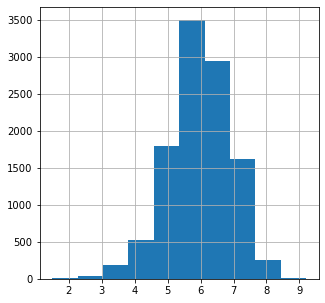

In [19]:
df_budget_revenue.iloc[:,1].hist(figsize = (5,5));
print(df_budget_revenue.iloc[:,1].describe())

> Note: vot_average is approximate symmetrically distributed where most films has average vote from 5 to 6.5, and 50% from films has average rate less than 6.

count    5.170000e+03
mean     3.688774e+07
std      4.195701e+07
min      9.210911e-01
25%      8.102293e+06
50%      2.272271e+07
75%      5.007483e+07
max      4.250000e+08
Name: budget_adj, dtype: float64


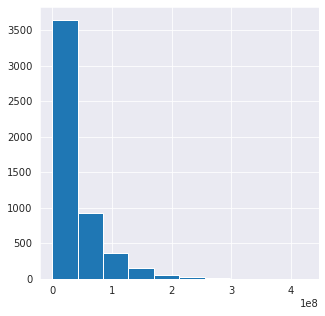

In [40]:
df = df_budget_revenue[df_budget_revenue.budget_adj!=0]
df.iloc[:,2].hist(figsize = (5,5));
print(df.iloc[:,2].describe())

>Note: we neglect rows that has budget is 0 this is very important to get approximatly exist values.

count    4.850000e+03
mean     1.150774e+08
std      1.988419e+08
min      2.370705e+00
25%      1.046262e+07
50%      4.392749e+07
75%      1.315644e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64


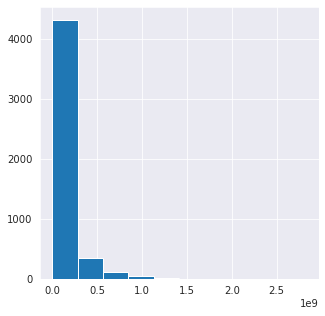

In [39]:
df = df_budget_revenue[df_budget_revenue.revenue_adj!=0]
df.iloc[:,3].hist(figsize = (5,5));
print(df.iloc[:,3].describe())

count    3.855000e+03
mean     9.279309e+07
std      1.940562e+08
min     -4.139124e+08
25%     -1.507157e+06
50%      2.736550e+07
75%      1.074152e+08
max      2.750137e+09
Name: net_profit, dtype: float64


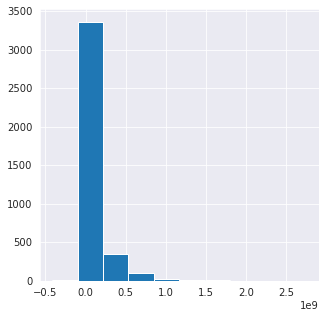

In [38]:
df = df_budget_revenue[df_budget_revenue.budget_adj!=0]
df = df[df.revenue_adj!=0]
df.iloc[:,4].hist(figsize = (5,5));
print(df.iloc[:,4].describe())

> #### Note: 25% of movies make losses.

<a id="Q1"></a>
### Q1: Is there a relation between budget and revenue(net profit)?

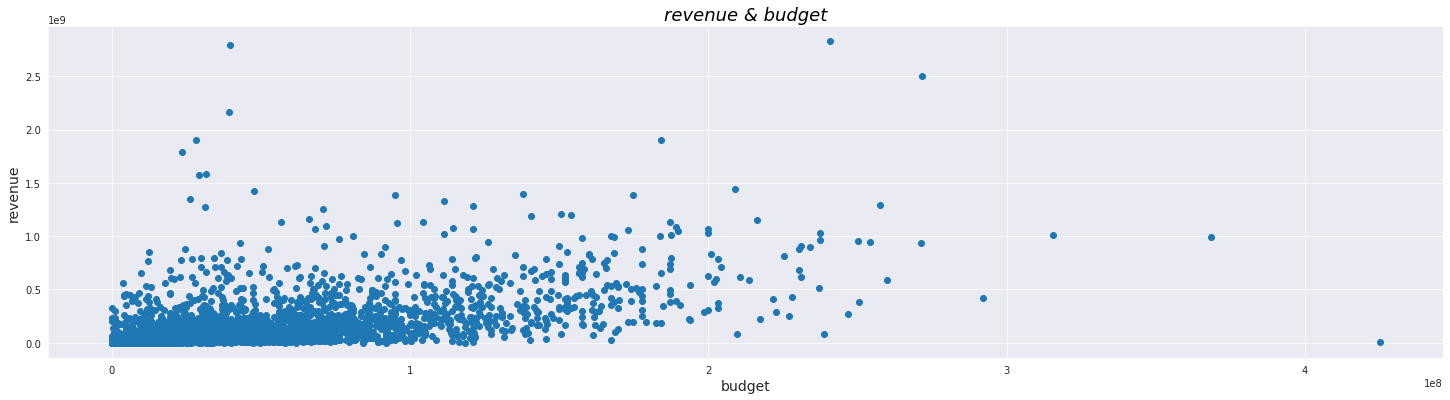

In [37]:
df = df_budget_revenue[df_budget_revenue.budget_adj!=0]
df = df[df.revenue_adj!=0]
my_plot(df.budget_adj,df.revenue_adj,"budget","revenue","revenue & budget","scatter")

> #### from gragh we can't said that there is clear relationship between budget and revenue.

<a id="Q2"></a>
### Q2: Is there a relation between average vote and revenue?

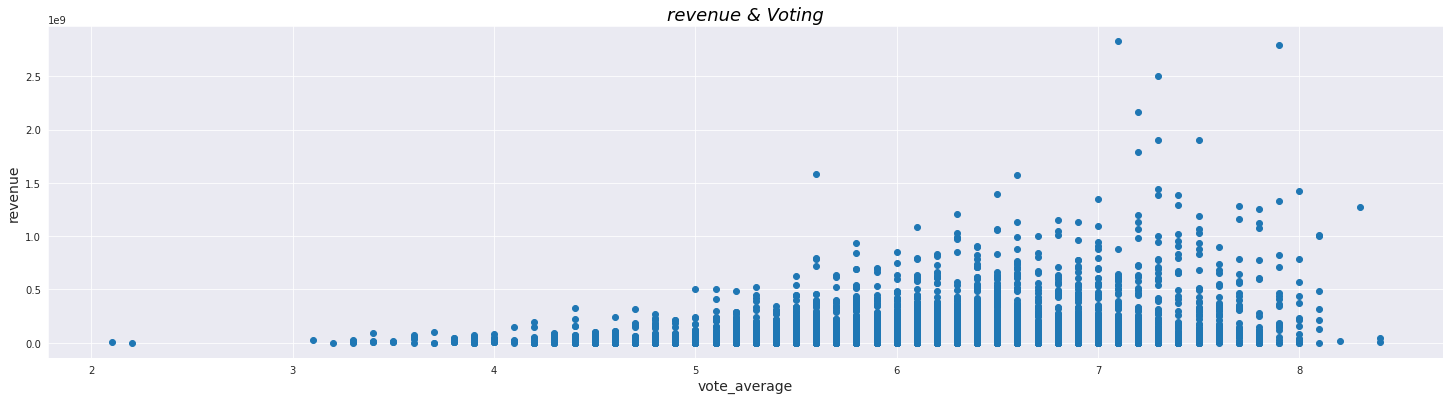

In [24]:
df = df_budget_revenue[df_budget_revenue.revenue_adj!=0]
my_plot(df.vote_average,df.revenue_adj,"vote_average","revenue","revenue & Voting","scatter")

> #### from gragh we can said films with revenue more than 0.5le9 has average vote more than 5 but there are alot of  films with revenue less than 0.5le9 has also average rate lead to 8 so The relationship is not direct.

<a id="Q3"></a>
### Q3: Is there a relation between budget and average vote?

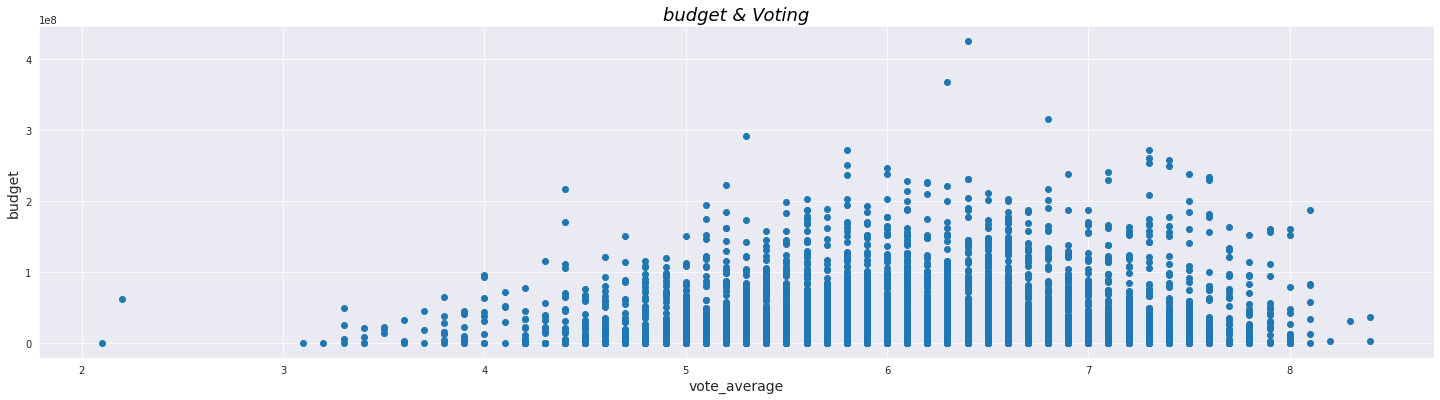

In [25]:
df_budget_revenue[df_budget_revenue.budget_adj!=0]
my_plot(df.vote_average,df.budget_adj,"vote_average","budget","budget & Voting","scatter")

> #### from gragh we can't said that there is clear relationship between users vote and budget.

<a id="Q14"></a>
### Q4: Is there a relation between net profit and average vote?

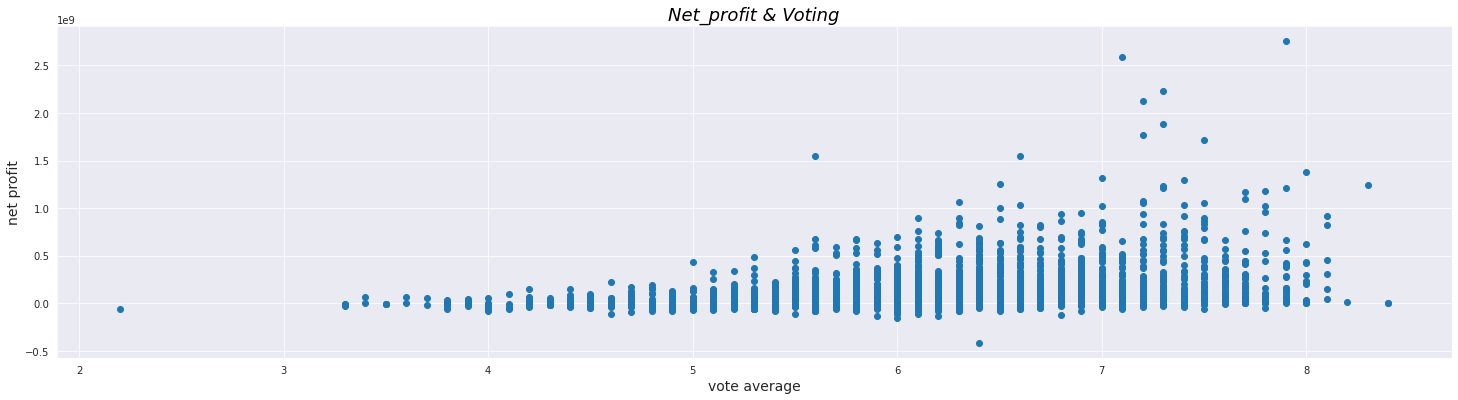

In [26]:
df = df_budget_revenue[df_budget_revenue.budget_adj!=0]
df = df[df.revenue_adj!=0]
my_plot(df.vote_average,df.net_profit,"vote average","net profit","Net_profit & Voting","scatter")

> #### from graph we can said little number of films can not get any profits but has average vote more than half and the relation almost like the relation between revenue and vote average.

<a id="Q4"></a>
### Q5: What is the best genres of films according to average vote?

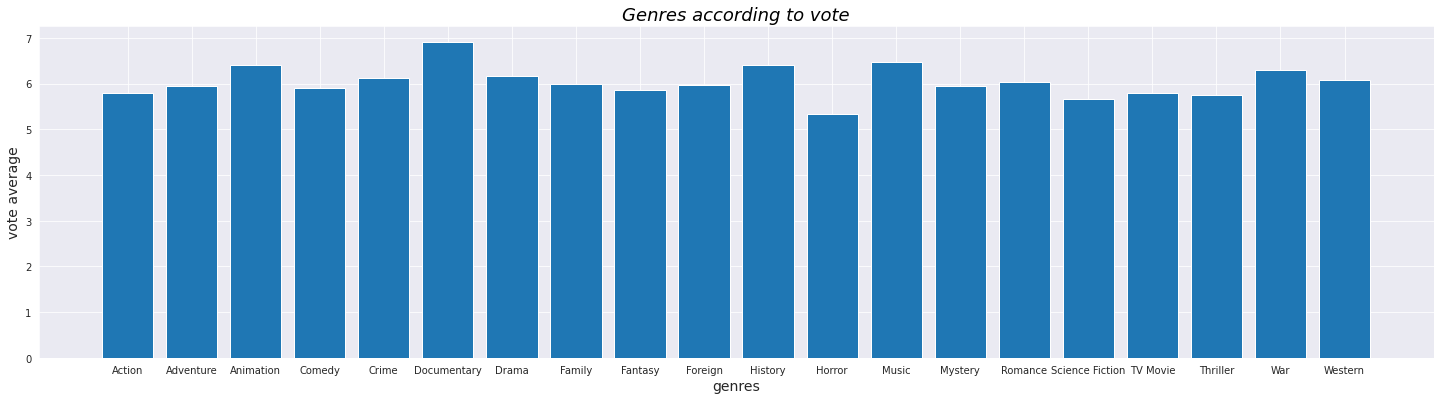

In [27]:
df = df_genres.groupby(["genres"]).mean()
ave =list(df.iloc[:,1])
gen =list(df.index)
my_plot(gen,ave,"genres","vote average","Genres according to vote","bar")

> #### from bar chart the documentary genre has more average vote than other genres.

<a id="Q5"></a>
### Q6: what is the best genres of films according to net profit?

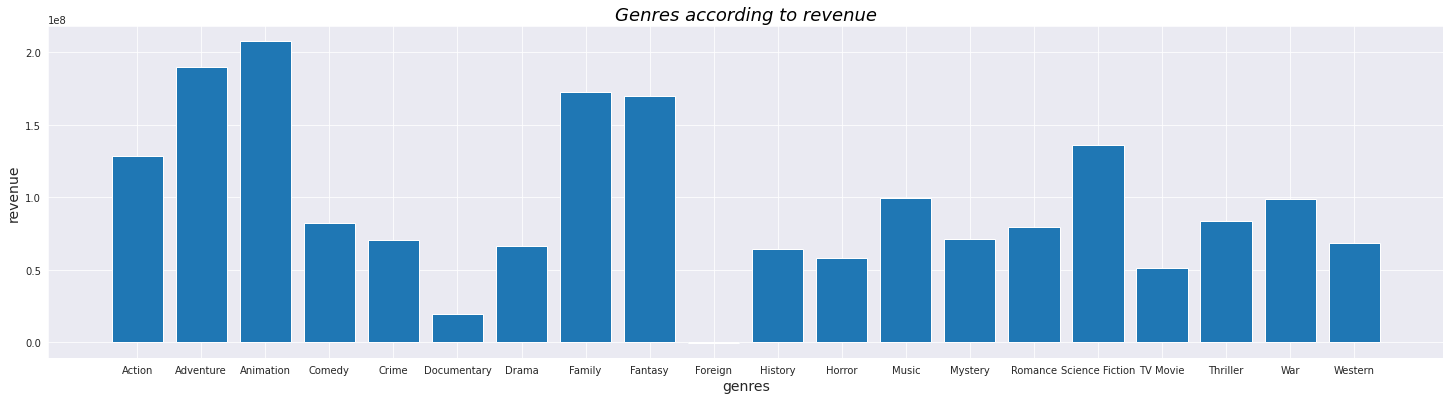

In [28]:
df = df_genres[df_genres.revenue_adj!=0]
df = df[df.budget_adj !=0].groupby(["genres"]).mean()
revenue =list(df.iloc[:,5])
gen =list(df.index)
my_plot(gen,revenue,"genres","revenue","Genres according to revenue","bar")

> #### Animation and Adventure films have more average revenues than others and although documentary genre has most average vote it has the second less profit.

<a id="Q6"></a>
### Q7: What is the best genres of films according to popularity?

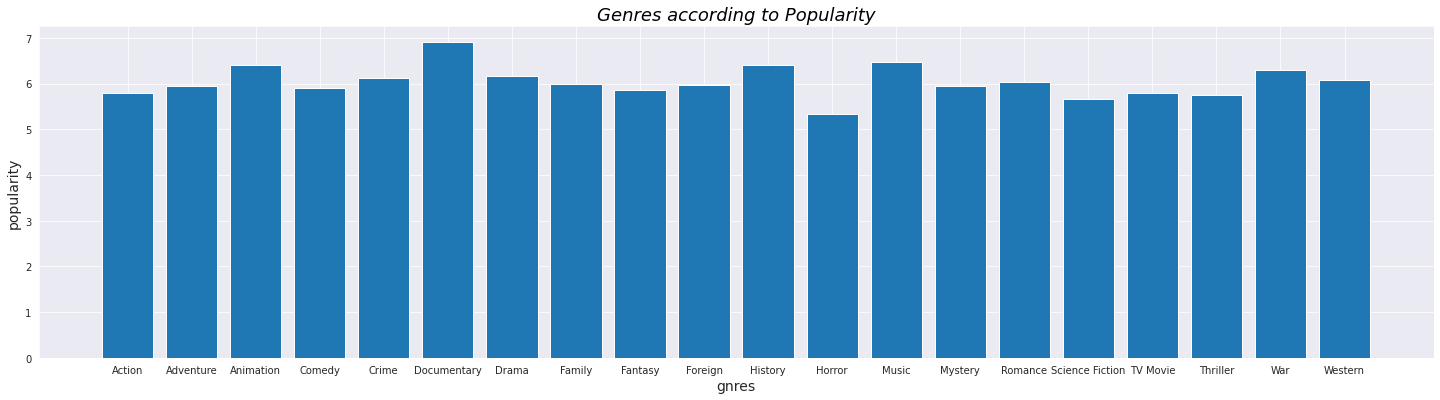

In [29]:
df = df_genres[df_genres.popularity!=0].groupby(["genres"]).mean()
popularity =list(df.iloc[:,0])
gen =list(df.index)
my_plot(gen,ave,"gnres","popularity","Genres according to Popularity","bar")

> #### Adventure genre are the most popular than others.

<a id="Q7"></a>
### Q8: What is the best director of films according to average vote?

In [30]:
df1 = df_director.groupby("director").mean()
df1.iloc[:,1].sort_values().tail(1)

director
Mark Cousins    9.2
Name: vote_average, dtype: float64

> #### Mark Cousins films have the highest average vote from user.

<a id="Q8"></a>
### Q9: What is the best director of films according to popularity?

In [31]:
df1 = df_director[df_director.popularity !=0].groupby("director").mean()
df1.iloc[:,0].sort_values().tail(1)

director
Colin Trevorrow    16.696886
Name: popularity, dtype: float64

> #### Colin Trevorrow's films are the most popularity.

<a id="Q9"></a>
### Q10: What is the best director of films according to net profit?

In [32]:
df1 = df_director[df_director.revenue_adj !=0]
df1 = df1[df1.budget_adj !=0].groupby("director").mean()
df1.iloc[:,5].sort_values().tail(1)

director
Irwin Winkler    1.551568e+09
Name: net_profit, dtype: float64

> #### Irwin Winkler's films has the most average revenue.

<a id="Q10"></a>
### Q11: Which genres are most popular in each year?

In [33]:
years = range(1961,2016)
years = list(years)
gen = []
for year in years:
    df1 = df_genres[df_genres.release_year == year]
    df1 = df1.groupby("genres").mean()
    gen.append(df1.sort_values("popularity").index[-1])
df1 = pd.DataFrame(list(zip(years,gen)),columns=["year","popular_genre"])
df1

,year,popular_genre
0,1961,Animation
1,1962,Adventure
2,1963,Animation
3,1964,War
4,1965,Music
5,1966,Animation
6,1967,Animation
7,1968,Mystery
8,1969,Crime
9,1970,Animation


> #### the previous table show the most popular genre in each year. 

<a id="Q11"></a>
### Q12: What is the most profitable production company?

In [34]:
df_production.groupby("production_companies").sum().iloc[:,5].sort_values().tail(3)

production_companies
Universal        4.760498e+10
Fox              5.206966e+10
Entertainment    9.536683e+10
Name: net_profit, dtype: float64

> #### the most profitable production company is Entertainment.

<a id="Q12"></a>
### Q13: what is the best actor of films according to average vote?

In [35]:
df_cast.groupby("cast").mean().iloc[:,1].sort_values().tail(1)

cast
Agnes de Mille    9.2
Name: vote_average, dtype: float64

> #### Agnes de Mille's films  has the highest average rating from viewers.

<a id="Q13"></a>
### Q14: what is the best actor of films according to net profit?

In [36]:
df_cast.groupby("cast").mean().iloc[:,5].sort_values().tail(1)

cast
Robert MacNaughton    1.767968e+09
Name: net_profit, dtype: float64

> #### Robert MacNaughton's films has the highest net profit.

<a id='conclusions'></a>
## Conclusions
- We can say that some films can achieve mass success, but they cannot achieve financial gains, such as documentaries, but animated films can achieve financial and public gains and great fame, just like adventure films and others.
- A large budget for films alone is not enough to achieve a large revenue.
- Some films with a small budget may be more popular and profitable than others with a larger budget.

#### data problems:
- some columns containing special charachters that make problems when runing code and It may cause some data to be lost.
- there are many rows with budget and revenue columns is zero this also make lost many of data to make my data clear.
- in voting row i can't neglect zero vote so if there is no data about voting it mast be null not 0.